# 1D system birfurcation codimension1

Here we will show the birfurcation analysis of 1D system with dummy test neuronal model.

$$\dot{x} = x^3-x + I$$

First, let's define the model.

In [1]:
import brainpy as bp

def define_model():
    @bp.integrate
    def int_x(x, t, input):
        dxdt = x ** 3 - x + input
        return dxdt

    def update(ST, _t):
        ST['x'] = int_x(ST['x'], _t, ST['input'])
        ST['input'] = 0.

    return bp.NeuType(name="dummy_model",
                      requires=dict(ST=bp.types.NeuState({'x': -10, 'input': 0.})),
                      steps=update)

Then, create an ``BifurcationAnalyzer``.

"dummy_model" requires "_t" as argument, but "_t" isn't declared in "requires".



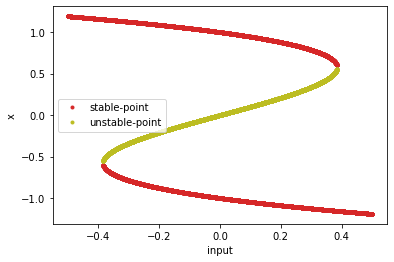

In [2]:
an = bp.BifurcationAnalyzer(
    model=define_model(),
    target_pars={'input': [-0.5, 0.5]},
    dynamical_vars={"x": [-2, 2]},
    par_resolution=0.0001)

an.plot_bifurcation(show=True)

# 1D system birfurcation codimension2

Here we define the following 1D model for codimension 2 bifurcation testing.

$$\dot{x} = \mu+ \lambda x - x^3$$

In [3]:
import matplotlib.pyplot as plt
import brainpy as bp

def define_model():
    lambd = 0
    mu = 0

    @bp.integrate
    def int_x(x, t):
        dxdt = mu + lambd * x - x ** 3
        return dxdt

    def update(ST, _t_):
        ST['x'] = int_x(ST['x'], _t_)

    return bp.NeuType(name="dummy_model",
                      requires=dict(ST=bp.types.NeuState({'x': 0.})),
                      steps=update)

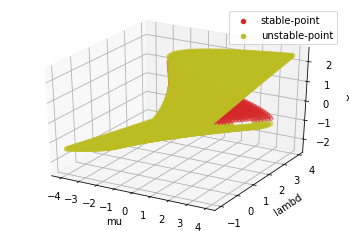

In [4]:
analyzer = bp.BifurcationAnalyzer(
    model=define_model(),
    target_pars={'mu': [-4, 4], 'lambd': [-1, 4]},
    dynamical_vars={'x': [-3, 3]},
    par_resolution=0.1)
analyzer.plot_bifurcation(plot_vars=['x'], show=True)